<a href="https://colab.research.google.com/github/polevev/kaggle/blob/main/Clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

levmarkovich_physical_path = kagglehub.dataset_download('levmarkovich/physical')

print('Data source import complete.')


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/physical/Physical_Activity_Monitoring_unlabeled.csv')
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


Устраним NAN

In [ ]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

In [ ]:
df.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


In [ ]:
from sklearn.impute import KNNImputer
import cudf

def imputed(df):
  df_cudf = cudf.DataFrame(df)
  imputer = KNNImputer(n_neighbors= 2)
  df_imputed = imputer.fit_transform(df_cudf.to_pandas())
  return df_imputed

In [ ]:
df_imputed = imputed(df)

KeyboardInterrupt: 

In [ ]:
df_filled = df.fillna(df.mean())

In [ ]:
df_filled.isna().sum()

timestamp            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2 

Без поиска числа кластеров

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

In [ ]:
pd.DataFrame(df_scaled, columns=df_filled.columns).describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,...,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05,5.346010e+05
mean,2.913672e-16,-5.979287e-15,1.681322e-16,8.941910e-17,3.127126e-16,-1.066742e-16,-2.168241e-16,-2.246193e-16,-1.089869e-18,-1.511861e-17,...,-1.763727e-17,-1.608221e-18,2.599072e-16,1.514519e-17,9.334329e-17,6.654846e-16,5.337035e-17,3.237177e-16,1.101565e-16,4.719664e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.250801e+00,-2.832182e+00,-1.568098e+01,-1.192119e+01,-2.044387e+01,-8.071186e+00,-9.510825e+00,-1.729174e+01,-1.702980e+01,-8.272104e+00,...,-1.242237e+01,-6.903104e+00,-7.483117e+00,-6.264235e+00,-6.573791e+00,-1.198384e+00,-1.547764e+00,-3.436761e+00,-1.769582e+00,-1.535160e+00
25%,-8.988129e-01,-6.513675e-01,-6.580918e-01,-3.496107e-01,-6.451320e-01,-6.519813e-01,-3.634089e-01,-6.450147e-01,-1.208268e-01,-1.182828e-01,...,-2.682080e-02,-1.054664e-01,-5.656612e-01,-5.837238e-01,-6.906048e-01,-7.134946e-01,-1.045657e+00,-8.623998e-01,-8.711293e-01,-1.103768e+00
50%,-6.157447e-01,2.066577e-01,-1.310847e-01,-1.713556e-02,6.711148e-03,-1.341095e-01,-9.096634e-03,2.522523e-02,3.266733e-03,-2.624679e-02,...,4.394607e-02,-8.695254e-04,1.159052e-01,-9.117973e-02,9.875603e-02,-3.866943e-01,1.632301e-01,4.884011e-02,-2.276979e-01,1.904104e-01
75%,1.031792e+00,7.786745e-01,6.827180e-01,3.163951e-01,7.239896e-01,6.801267e-01,3.418987e-01,7.528166e-01,1.166013e-01,6.779651e-02,...,1.296685e-01,1.474960e-02,7.373557e-01,7.683740e-01,6.264367e-01,4.678178e-01,8.968367e-01,8.422690e-01,8.948542e-01,1.053196e+00
max,1.940816e+00,1.600949e+00,9.288630e+00,2.116118e+01,1.949323e+01,5.472064e+00,8.633344e+00,1.486016e+01,1.987410e+01,1.281655e+01,...,9.774540e+00,7.128823e+00,3.661940e+00,4.087882e+00,6.034087e+00,2.129004e+00,1.882628e+00,1.796446e+00,2.514984e+00,1.484589e+00


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(df_scaled)

Y_pred = kmeans.labels_

In [ ]:
import numpy as np
np.unique(Y_pred)

NameError: name 'Y_pred' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_scaled)

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', edgecolors='k', label="Центроиды")
plt.legend()
plt.title("K-Means")
plt.show()

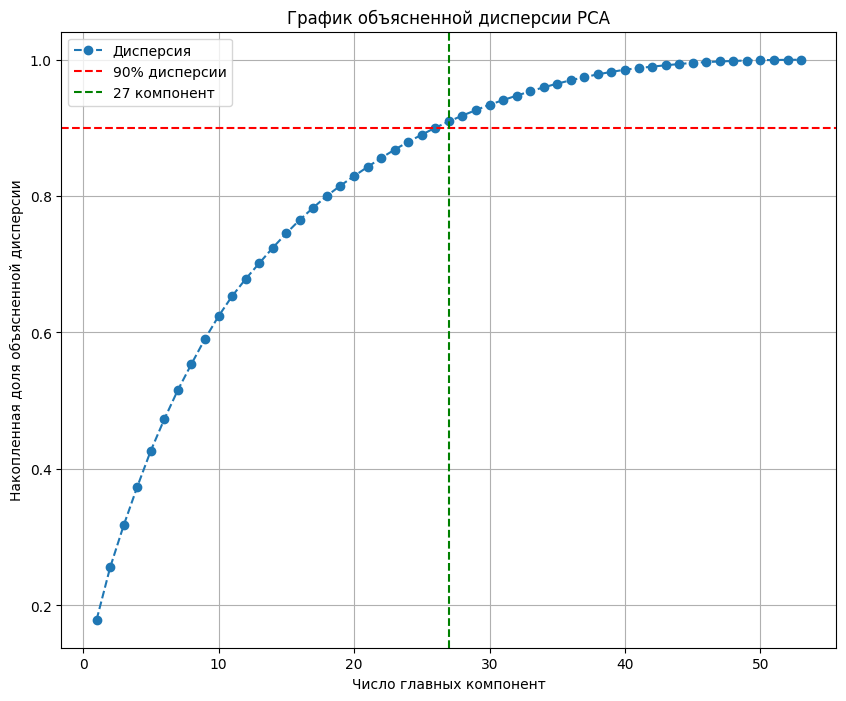

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label="Дисперсия")

# Добавляем горизонтальную линию на уровне 0.9
plt.axhline(y=0.9, color='r', linestyle='--', label="90% дисперсии")

# Добавляем вертикальную линию на X = 40
plt.axvline(x=27, color='g', linestyle='--', label="27 компонент")

plt.xlabel('Число главных компонент')
plt.ylabel('Накопленная доля объясненной дисперсии')
plt.title('График объясненной дисперсии PCA')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=27)
X_pca_scaled = pca.fit_transform(df_scaled)

print("Форма данных после PCA:", X_pca_scaled.shape)

Форма данных после PCA: (534601, 27)


In [ ]:
import numpy as np

In [ ]:
# Применяем SVD
U, S, Vt = np.linalg.svd(df_scaled, full_matrices=False)

# Выбираем первые k компонент
k = 27  # Уменьшим до 27 измерений
X_pca_manual = df_scaled @ Vt[:k].T  # Умножаем на транспонированную часть

print("Форма данных после SVD:", X_pca_manual.shape)

Форма данных после SVD: (534601, 27)


In [ ]:
X_pca_manual

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-5.951374,0.364499,-0.173057,-0.854915,0.263909,-0.541668,0.781569,0.163003,-1.762493,-0.453408,...,0.578641,0.299367,0.144227,0.262205,-0.000149,0.146201,-0.013605,0.196430,0.379572,0.121779
1,1.155086,-4.239882,-1.789262,0.154083,-0.852250,0.576277,-2.776170,0.801218,0.677975,0.500837,...,0.504973,0.962052,0.216154,-0.938837,0.077471,0.012894,-0.341690,-1.197813,-0.445563,0.524443
2,-0.262890,2.910558,-2.051573,0.845455,0.823412,1.502378,0.816563,-0.934039,-0.432889,-0.463435,...,-0.291588,-0.419005,-0.795163,-1.273597,-0.618261,-1.092805,0.485896,-0.171488,0.504296,0.553508
3,3.831110,1.148066,-0.052670,1.707828,-1.356243,0.674342,-0.069464,2.049879,-0.050488,-2.919390,...,-0.193733,1.503352,-0.322050,-1.423582,0.928313,-0.323837,0.021627,3.240258,-0.176862,0.944667
4,-0.737869,-0.136178,1.211712,-2.241988,-0.058866,-0.570159,-1.001451,-0.320267,-0.912198,0.267176,...,0.071404,-0.207491,-0.145485,-0.363026,-0.488767,-0.209657,0.245808,-0.109437,0.120423,-0.263742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3.069228,-1.106241,0.573010,-1.054590,4.217485,-1.072076,-1.415540,-1.711951,-1.261604,0.927877,...,-1.224736,-0.732302,0.898059,-0.792112,1.262528,-0.023605,-0.157951,-0.678576,0.742618,-0.549913
534597,0.844590,2.496105,1.291498,1.834689,-0.385118,3.537437,-0.135889,0.764374,-2.665302,-0.096315,...,1.961658,0.124075,-1.267339,-1.729657,-0.335097,-0.685607,-0.797572,1.404760,0.150001,0.488032
534598,0.943136,1.892480,-0.972713,2.071190,0.580161,-0.713034,0.623256,-0.684960,-1.101537,-1.101499,...,-0.889283,-1.500672,0.117921,0.880249,0.229671,0.877686,0.225668,-0.495180,-1.645135,-0.631382
534599,5.171315,1.455641,5.819866,-0.787618,2.913938,-1.204550,0.555066,1.933125,-0.232501,4.626276,...,-0.841254,-3.371444,-1.712204,-2.513209,-0.320958,-4.119659,-3.252345,-1.900585,1.413154,0.286754


In [ ]:
X_train_scaled = X_pca_scaled[:30000]
X_train = df_filled[:30000]

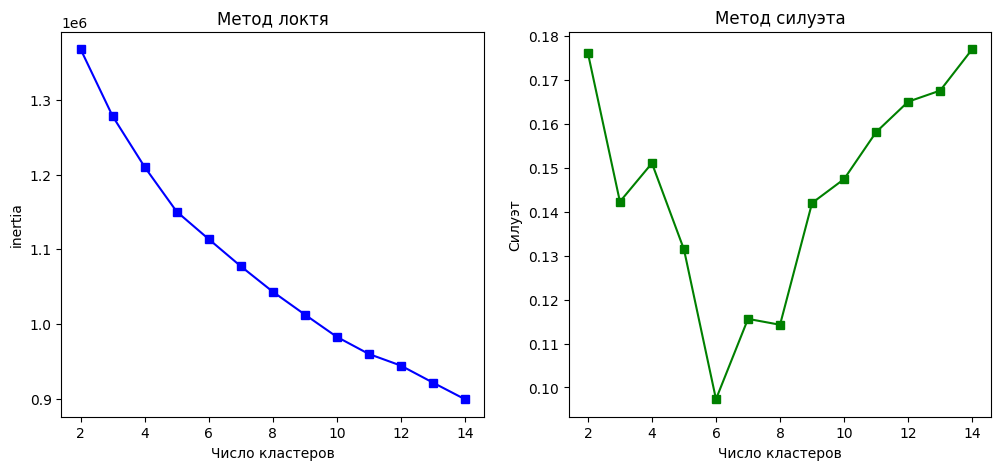

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

SSE = [] # для локтя
sil = [] # для силуэта

for k in range(2, 15): # 1, 2, 3, 4, 5, ..., 8
    kmeans = KMeans(n_clusters = k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    SSE.append(kmeans.inertia_)
    sil.append(silhouette_score(X_train, kmeans.fit_predict(X_train_scaled)))

# Построение графика
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(range(2,15), SSE, marker='s', color = 'b')
ax[0].set_title('Метод локтя')
ax[0].set_xlabel('Число кластеров')
ax[0].set_ylabel('inertia')
ax[1].plot(range(2,15), sil, marker='s', color = 'g')
ax[1].set_title('Метод силуэта')
ax[1].set_xlabel('Число кластеров')
ax[1].set_ylabel('Cилуэт')

plt.show()

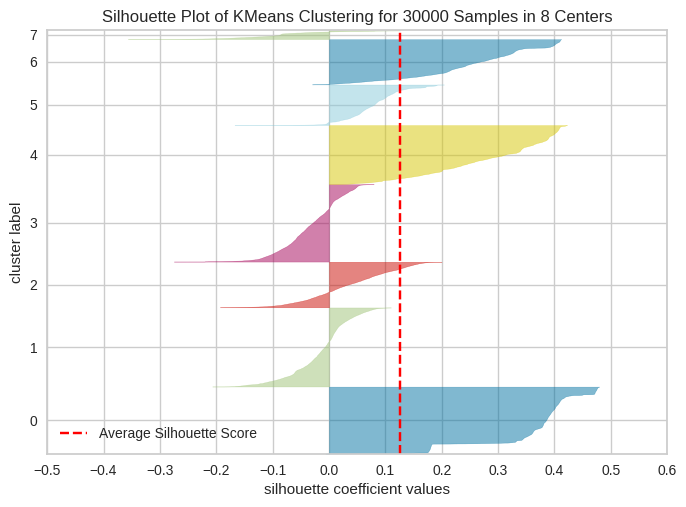

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(8, random_state=42), X_train, colors='yellowbrick')

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 8

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(X_pca_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

In [ ]:
predictions['activityID'].unique()

array([1, 7, 5, 6, 4, 0, 2, 3], dtype=int32)

In [ ]:
for index, row in predictions.iterrows():
    if row['activityID'] == 1:
        predictions.loc[index, 'new_label'] = 1
    if row['activityID'] == 7:
        predictions.loc[index, 'new_label'] = 2
    if row['activityID'] == 5:
        predictions.loc[index, 'new_label'] = 3
    if row['activityID'] == 6:
        predictions.loc[index, 'new_label'] = 4
    if row['activityID'] == 4:
        predictions.loc[index, 'new_label'] = 5
    if row['activityID'] == 0:
        predictions.loc[index, 'new_label'] = 6
    if row['activityID'] == 2:
        predictions.loc[index, 'new_label'] = 7
    if row['activityID'] == 3:
        predictions.loc[index, 'new_label'] = 8

In [ ]:
predictions

,index,activityID,new_label
0,0,1,1.0
1,1,7,2.0
2,2,5,3.0
3,3,6,4.0
4,4,4,5.0
...,...,...,...
534596,534596,7,2.0
534597,534597,6,4.0
534598,534598,6,4.0
534599,534599,3,8.0


In [ ]:
predictions = predictions.drop(columns=['activityID'])
predictions.columns = ['index','activityID']

In [ ]:
predictions['activityID'] = predictions['activityID'].apply(lambda x: int(x))

In [ ]:
predictions

,index,activityID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
...,...,...
534596,534596,2
534597,534597,4
534598,534598,4
534599,534599,8


In [ ]:
predictions.to_csv('pca_knn.csv', index=False)

Следующий вариант

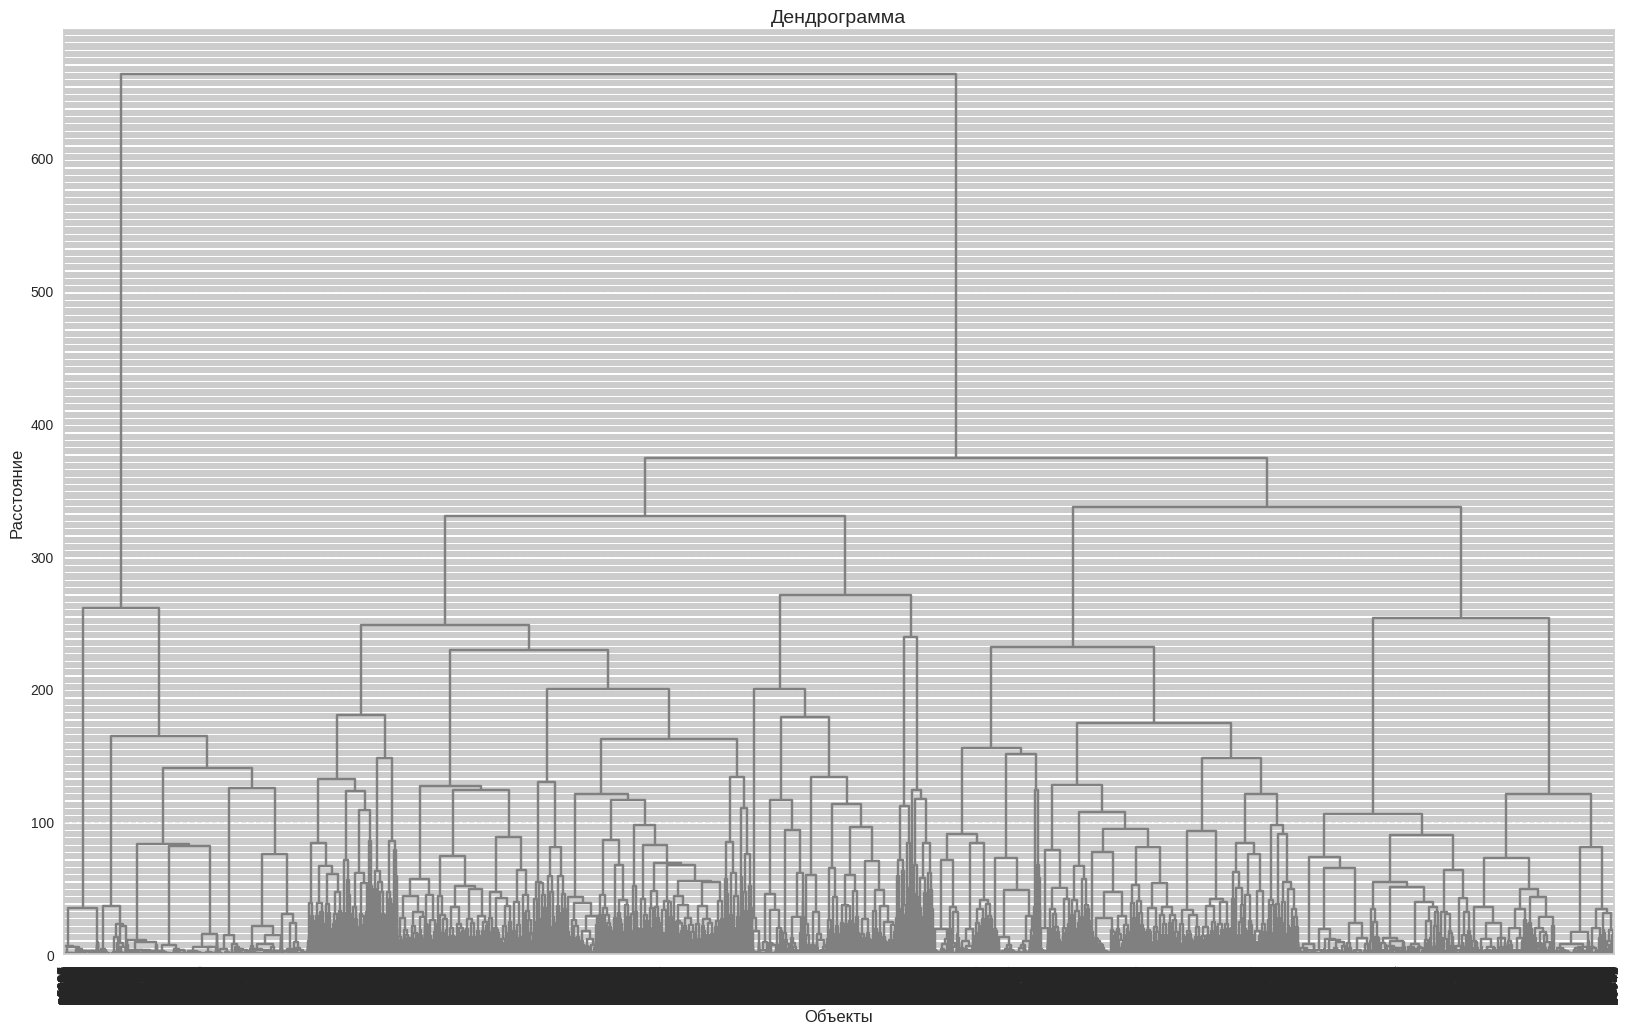

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# матрица расстояний
Z = linkage(X_train, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z,
    leaf_font_size=10,  # Размер шрифта меток
    orientation='top',   # Ориентация (можно попробовать 'left'/'right')
    color_threshold=0,   # Подсветка кластеров
    above_threshold_color='gray')
plt.title("Дендрограмма", fontsize=14)
plt.xlabel("Объекты", fontsize=12)
plt.ylabel("Расстояние", fontsize=12)
plt.xticks(rotation=90)  # Поворот меток на 90 градусов
plt.yticks(fontsize=10)  # Размер шрифта для оси Y
plt.grid(True, linestyle='--', alpha=0.5)  # Сетка для удобства

plt.show()

In [ ]:
Z.shape

(29999, 4)

In [ ]:
Z[120]

array([1.52480000e+04, 2.44850000e+04, 1.09711553e-01, 2.00000000e+00])

In [ ]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

y_pred = fcluster(Z, 250, criterion='distance')

np.unique(y_pred)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/rapids-colab.sh stable

import os
os._exit(00)

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 587, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 587 (delta 122), reused 85 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (587/587), 193.00 KiB | 3.71 MiB/s, done.
Resolving deltas: 100% (296/296), done.
  File "/kaggle/working/rapidsai-csp-utils/colab/rapids-colab.sh", line 3
    echo "PLEASE READ FOR 21.06"
         ^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax


In [ ]:
from cuml.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='single')

y_hc = hc.fit_predict(X_pca_scaled)

In [ ]:
import numpy as np
np.unique(y_hc)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
predictions_hc = pd.DataFrame(y_hc, columns=['activityID'])
predictions_hc = predictions_hc.reset_index()

In [ ]:
predictions_hc['activityID'].value_counts()

activityID
0    534588
4         4
2         2
1         2
3         2
7         1
6         1
5         1
Name: count, dtype: int64

In [ ]:
predictions_hc['activityID'].unique()

array([4, 0, 2, 3, 7, 1, 6, 5], dtype=int32)

In [ ]:
for index, row in predictions_hc.iterrows():
    if row['activityID'] == 4:
        predictions_hc.loc[index, 'new_label'] = 1
    if row['activityID'] == 0:
        predictions_hc.loc[index, 'new_label'] = 2
    if row['activityID'] == 2:
        predictions_hc.loc[index, 'new_label'] = 3
    if row['activityID'] == 3:
        predictions_hc.loc[index, 'new_label'] = 4
    if row['activityID'] == 7:
        predictions_hc.loc[index, 'new_label'] = 5
    if row['activityID'] == 1:
        predictions_hc.loc[index, 'new_label'] = 6
    if row['activityID'] == 6:
        predictions_hc.loc[index, 'new_label'] = 7
    if row['activityID'] == 5:
        predictions_hc.loc[index, 'new_label'] = 8

In [ ]:
predictions_hc

,index,activityID,new_label
0,0,4,1.0
1,1,0,2.0
2,2,4,1.0
3,3,0,2.0
4,4,4,1.0
...,...,...,...
534596,534596,0,2.0
534597,534597,2,3.0
534598,534598,2,3.0
534599,534599,0,2.0


In [ ]:
predictions_hc = predictions_hc.drop(columns=['activityID'])
predictions_hc.columns = ['index','activityID']

In [ ]:
predictions_hc['activityID'] = predictions_hc['activityID'].apply(lambda x: int(x))

In [ ]:
predictions_hc.to_csv('agglomerative_submition_2.csv', index = False)

DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train_scaled = X_pca_manual[:30000]

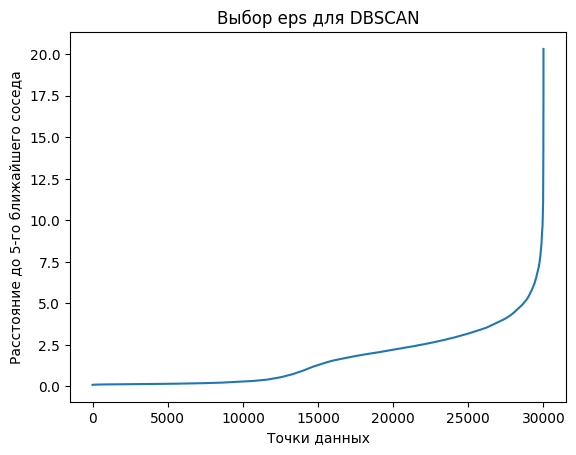

In [ ]:
from cuml.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(X_train_scaled)
distances, _ = nbrs.kneighbors(X_train_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5-го ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_filled.columns)

In [ ]:
df_scaled

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,-1.077886,1.386442e+00,0.758769,0.585934,5.117224e-01,7.642506e-01,6.181657e-01,0.536072,-1.133458e-02,-0.026738,...,0.010213,0.013752,0.737963,1.135940,-1.146924,-0.511565,0.787192,1.338432,-0.708970,0.190410
1,1.655200,-1.545144e+00,0.052017,0.072218,1.100504e+00,-2.267199e-01,6.551038e-04,0.695050,1.080767e-01,-0.438384,...,-1.033834,0.878227,-0.211312,-0.805741,-0.897704,0.725947,-0.852302,0.298067,-0.537297,-1.103768
2,-0.875290,1.100434e+00,0.345083,-1.784680,-8.661045e-01,3.652836e-01,-1.872793e+00,-0.837497,2.507819e-02,0.014499,...,0.035911,-0.004373,0.516111,0.639334,0.591636,-0.733303,1.375606,0.262860,1.677074,1.484589
3,0.971193,-2.938570e-01,-1.254669,0.363012,-8.331812e-01,-1.311468e+00,3.943481e-01,-0.898770,1.492130e+00,-0.085878,...,-0.213098,-1.722033,0.104606,1.452290,0.369669,0.186813,1.566983,0.008581,1.115497,-1.103768
4,-0.926540,5.999193e-01,0.628456,0.753606,8.353575e-02,6.418530e-01,7.822900e-01,0.146993,1.656410e-03,-0.039189,...,0.006056,-0.002974,0.569975,-0.275392,-0.208698,-0.628965,-1.177727,-0.147122,-0.892024,0.621803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,1.516186,8.144256e-01,-0.660810,0.202770,-3.115757e-01,-7.545546e-01,5.209291e-01,-0.075398,-1.285381e-01,0.807289,...,0.739322,-0.422962,0.194538,-1.156361,0.497737,-0.139712,-1.094544,0.734492,-0.296437,0.190410
534597,0.687313,4.064424e-15,0.000000,0.000000,2.327056e-16,1.261225e-16,6.493689e-17,0.000000,-1.500992e-18,0.000000,...,-2.811629,-1.503158,-0.360690,1.337209,0.095073,0.251976,1.347038,0.198422,1.416716,0.190410
534598,0.712516,1.279189e+00,-0.274654,-0.127926,-4.904008e-01,-2.820948e-01,-1.298126e-01,-0.434634,1.862056e-01,-0.420456,...,-0.003617,-0.199049,-1.087137,0.832802,-0.875536,0.670446,0.697140,1.319698,0.700236,0.190410
534599,1.482655,-2.510422e+00,1.406804,0.999692,-3.446044e+00,1.806932e+00,3.724246e-01,-2.732899,3.074073e+00,2.955090,...,0.621955,-2.747109,-0.280344,-0.594332,1.400194,-0.991552,-1.267971,-1.048725,-0.907089,0.621803


In [ ]:
from cuml.cluster import DBSCAN
eps = 0.5
min_samples = 1
step_eps = 0.5
step_min_samples = 2

for i in range(100):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_train_scaled)

    if len(np.unique(labels)) == 4:
        print(f"Найдены параметры: eps={eps}, min_samples={min_samples}")
        found = True
        break

    eps += step_eps
    min_samples += step_min_samples

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=54)
labels = dbscan.fit(X_train_scaled)

In [ ]:
np.unique(labels.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int32)

In [ ]:
label = dbscan.fit_predict(X_pca_manual)

[2025-04-14 08:56:14.800] [CUML] [warning] Batch size limited by the chosen integer type (4 bytes). 4692 -> 4016. Using the larger integer type might result in better performance


In [ ]:
np.unique(label)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

In [ ]:
predictions_db = pd.DataFrame(label, columns=['activityID'])
predictions_db = predictions_db.reset_index()

In [ ]:
predictions_db['activityID'].unique()

array([ 0, -1,  1,  2,  9,  3,  7,  4,  6,  8,  5], dtype=int32)

In [ ]:
for index, row in predictions_db.iterrows():
    if row['activityID'] == 0:
        predictions_db.loc[index, 'new_label'] = 1
    if row['activityID'] == -1:
        predictions_db.loc[index, 'new_label'] = 2
    if row['activityID'] == 1:
        predictions_db.loc[index, 'new_label'] = 3
    if row['activityID'] == 2:
        predictions_db.loc[index, 'new_label'] = 4
    if row['activityID'] == 9:
        predictions_db.loc[index, 'new_label'] = 5
    if row['activityID'] == 3:
        predictions_db.loc[index, 'new_label'] = 6
    if row['activityID'] == 7:
        predictions_db.loc[index, 'new_label'] = 7
    if row['activityID'] == 4:
        predictions_db.loc[index, 'new_label'] = 8
    if row['activityID'] == 6:
        predictions_db.loc[index, 'new_label'] = 9
    if row['activityID'] == 8:
        predictions_db.loc[index, 'new_label'] = 10
    if row['activityID'] == 5:
        predictions_db.loc[index, 'new_label'] = 11

In [ ]:
predictions_db

,index,activityID,new_label
0,0,0,1.0
1,1,0,1.0
2,2,0,1.0
3,3,0,1.0
4,4,0,1.0
...,...,...,...
534596,534596,0,1.0
534597,534597,0,1.0
534598,534598,0,1.0
534599,534599,-1,2.0


In [ ]:
predictions_db = predictions_db.drop(columns=['activityID'])
predictions_db.columns = ['index','activityID']

In [ ]:
predictions_db

,index,activityID
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
534596,534596,1.0
534597,534597,1.0
534598,534598,1.0
534599,534599,2.0


In [ ]:
predictions_db['activityID'].value_counts()

activityID
1.0     509539
3.0      11524
2.0      10474
4.0       2631
6.0        132
8.0         66
5.0         59
7.0         55
10.0        53
9.0         43
11.0        25
Name: count, dtype: int64

In [ ]:
predictions_db['activityID'] = predictions_db['activityID'].apply(lambda x: int(x))

In [ ]:
predictions_db.to_csv('db_pca.csv', index=False)

In [ ]:
import cuml
print(cuml.__version__)

25.02.01


In [ ]:
from cuml.cluster import HDBSCAN

In [ ]:
hdbscan_clusters = HDBSCAN(
    min_cluster_size=1000,
    min_samples=54,
    cluster_selection_epsilon=0.01,
    cluster_selection_method='leaf',
    alpha=1.0,
    metric='euclidean').fit_predict(X_train_scaled)

In [ ]:
np.unique(hdbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int32)

In [ ]:
label = HDBSCAN(min_cluster_size=18000,
    min_samples=54,
    cluster_selection_epsilon=0.01,
    cluster_selection_method='leaf',
    alpha=1.0,
    metric='euclidean').fit_predict(X_pca_manual)

In [ ]:
np.unique(label)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int32)

In [ ]:
predictions_hdb = pd.DataFrame(label, columns=['activityID'])
predictions_hdb = predictions_hdb.reset_index()

In [ ]:
predictions_hdb['activityID'].value_counts()

activityID
-1    284320
 0     52508
 2     52399
 1     44069
 5     39812
 4     38176
 3     23317
Name: count, dtype: int64

In [ ]:
predictions_hdb['activityID'].unique()

array([ 0,  2, -1,  5,  1,  4,  3], dtype=int32)

In [ ]:
for index, row in predictions_hdb.iterrows():
    if row['activityID'] == 0:
        predictions_hdb.loc[index, 'new_label'] = 1
    if row['activityID'] == 2:
        predictions_hdb.loc[index, 'new_label'] = 2
    if row['activityID'] == -1:
        predictions_hdb.loc[index, 'new_label'] = 3
    if row['activityID'] == 5:
        predictions_hdb.loc[index, 'new_label'] = 4
    if row['activityID'] == 1:
        predictions_hdb.loc[index, 'new_label'] = 5
    if row['activityID'] == 4:
        predictions_hdb.loc[index, 'new_label'] = 6
    if row['activityID'] == 3:
        predictions_hdb.loc[index, 'new_label'] = 7

In [ ]:
predictions_hdb = predictions_hdb.drop(columns=['activityID'])
predictions_hdb.columns = ['index','activityID']

In [ ]:
predictions_hdb

,index,activityID
0,0,1
1,1,2
2,2,3
3,3,3
4,4,4
...,...,...
534596,534596,3
534597,534597,3
534598,534598,3
534599,534599,3


In [ ]:
predictions_hdb['activityID'] = predictions_hdb['activityID'].apply(lambda x: int(x))

In [ ]:
predictions_hdb.to_csv('hdb_scan.csv', index=False)